> 타이타닉호 침몰 사고는 많은 사망자 수를 기록한 사고이다. 하지만, 탑승객들 중 생존한 사람들도 있으며, 이들이 어떻게 생존하였는지, 생존한 사람들의 특징이 있는지 파악해보기 위해 각 컬럼별 생존률을 중점으로 데이터를 살펴 볼 예정이다.

In [2]:
# 모듈 로딩
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

### 초기 데이터셋 정보
> survived(생존 여부) : 0 = 사망, 1 = 생존  
pclass(수치형 객실 등급) : 1 = 1등석, 2 = 2등석, 3 = 3등석  
sex(성별) : male = 남성, female = 여성  
age(나이)  
sibsp(동승한 형제 및 배우자의 수)  
parch(동승한 부모 및 자식의 수)  
fare(승객 요금)   
embarked(탑승지) : C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴  
class(문자형 객실 등급) : First = 1등석, Second = 2등석, Third = 3등석  
who(남자, 여자, 아이) : man, woman, child  
adult_male : True(성인 남자), False(그 외)  
deck(선실 번호 첫 글자) : A, B, C, D, E, F, G  
embark_town(탑승지 이름) : Cherbourg, Queenstown, Southampton  
alive(생존 여부) : no(사망), yes(생존)  
alone(혼자 탑승 여부) : True(혼자 탑승), False(동승 탑승)  

In [3]:
# 데이터 로딩
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 유사한 데이터 확인

> (survived, alive), (pclass, class), (embarked, embark_town)이 각각 의미하는 바가 같은 것으로 추측되며 같은 데이터라면 하나만 사용하도록 결정  

> value_counts()를 확인했을때 범주가 같다면 두 데이터는 완벽하게 동일한 데이터라는 것을 의미한다.

In [4]:
# survived와 alive가 같은 데이터인지 확인하기
survive_data = df.loc[:, ['survived', 'alive']]
survive_data.value_counts()

survived  alive
0         no       549
1         yes      342
Name: count, dtype: int64

> 확인 결과 survived와 alive 데이터는 같다.  

In [5]:
# pclass와 class가 같은 데이터인지 확인하기
class_data = df.loc[:, ['pclass', 'class']]
class_data.value_counts()

pclass  class 
3       Third     491
1       First     216
2       Second    184
Name: count, dtype: int64

> 확인 결과 pclass와 class 데이터는 같다.  

In [6]:
# embarked와 embark_town이 같은 데이터인지 확인하기
embark_data = df.loc[:, ['embarked', 'embark_town']]
embark_data.value_counts()

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

> 확인 결과 embarked와 embark_town 데이터는 같다.  

In [7]:
# 중복된 의미의 컬럼 중 하나 제거
df2 = df.drop(['survived', 'pclass', 'embarked'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   deck         203 non-null    object 
 9   embark_town  889 non-null    object 
 10  alive        891 non-null    object 
 11  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(6)
memory usage: 71.5+ KB


In [8]:
# 중복 데이터 확인
df2.duplicated().sum()

107

In [9]:
df3 = df2.drop_duplicates(keep = False)

In [10]:
# 결측치 개수 확인
df3.isna().sum()
# age: 84개, embarked: 2개, deck: 530개

sex              0
age             84
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# deck 변수의 범주 확인
df3['deck'].value_counts()

deck
C    59
B    45
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

> deck 변수의 경우 결측치가 너무 많아 결측치를 다른 값으로 대체 하기에는 대체한 값들의 대표성이 너무 부족해지며 결측치인 행들을 모두 제거하자니 데이터의 손실이 크기 때문에 deck 컬럼을 제거하기로 결정

In [12]:
# deck 컬럼 제거
df4 = df3.drop(['deck'], axis = 1)

In [13]:
# 결측치 확인
df4.isna().sum()

sex             0
age            84
sibsp           0
parch           0
fare            0
class           0
who             0
adult_male      0
embark_town     2
alive           0
alone           0
dtype: int64

In [14]:
# age 변수의 범주 확인
df4['age'].value_counts()

age
24.00    28
18.00    24
36.00    22
19.00    22
22.00    21
         ..
36.50     1
0.92      1
23.50     1
55.50     1
74.00     1
Name: count, Length: 87, dtype: int64

In [15]:
# age 변수의 평균 확인
df4['age'].mean()

30.002581143740336

> age 변수의 경우 결측치가 177개로 적은 개수는 아니지만 그렇다고 컬럼을 없애거나 177개의 행을 모두 없애자니 나머지 데이터의 손실이 클 것으로 예상되기 때문에 값을 채우기로 결정했다.
하지만, age의 평균값으로 채우자니 177개의 데이터가 모두 30살로 들어가므로 데이터의 편향이 생길 가능성이 생긴다. 따라서, who 변수를 이용하여 남자는 남자의 평균, 여자는 여자의 평균, 아이는 아이의 평균으로 값을 대체하여 데이터의 왜곡을 최소화 하기로 결정했다.

In [16]:
df4.loc[:, ['who', 'adult_male']].value_counts() # 성인 남자: 410명, 성인 여자: 240명, 아이: 81명

who    adult_male
man    True          410
woman  False         240
child  False          81
Name: count, dtype: int64

In [17]:
man_mean = df4[df4['who'] == 'man']['age'].mean() # 성인 남자의 나이 평균
woman_mean = df4[df4['who'] == 'woman']['age'].mean() # 성인 여자의 나이 평균
child_mean = df4[df4['who'] == 'child']['age'].mean() # 아이의 나이 평균
man_mean, woman_mean, child_mean

(34.186797752808985, 31.97142857142857, 6.5082716049382725)

In [18]:
age_who_df = df4.loc[:, ['age', 'who']]
age_list = []
for i in range(len(age_who_df)):
    if (pd.isna(age_who_df.iloc[i, 0]) == True): # 만약 age가 결측값이라면
        if age_who_df.iloc[i, 1] == 'man': # 만약 결측값이 man이라면
            age_list.append(man_mean) # 남자 평균 넣기
        elif age_who_df.iloc[i, 1] == 'woman': # 만약 결측값이 woman이라면
            age_list.append(woman_mean) # 여자 평균 넣기
        else:   # 만약 결측값이 child라면
            age_list.append(child_mean) # 아이 평균 넣기
    else: # 만약 age가 결측값이 아니라면
        age_list.append(age_who_df.iloc[i, 0]) # 원래 값 넣기

In [19]:
df4['new_age'] = age_list # 평균값을 대체한 새로운 나이 컬럼
df5 = df4.drop(['age'], axis = 1)
df5

,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age
0,male,1,0,7.2500,Third,man,True,Southampton,no,False,22.000000
1,female,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.000000
2,female,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.000000
3,female,1,0,53.1000,First,woman,False,Southampton,yes,False,35.000000
5,male,0,0,8.4583,Third,man,True,Queenstown,no,True,34.186798
...,...,...,...,...,...,...,...,...,...,...,...
885,female,0,5,29.1250,Third,woman,False,Queenstown,no,False,39.000000
887,female,0,0,30.0000,First,woman,False,Southampton,yes,True,19.000000
888,female,1,2,23.4500,Third,woman,False,Southampton,no,False,31.971429
889,male,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.000000


In [20]:
# 나이 최대값 확인
df5.loc[:, 'new_age'].max()

80.0

In [21]:
# 나이 컬럼 범주화
df5.loc[:, 'new_age']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['1~9세', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
df5['age_group'] = pd.cut(df5['new_age'], bins=bins, labels=labels, right=False)

df5

,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age,age_group
0,male,1,0,7.2500,Third,man,True,Southampton,no,False,22.000000,20대
1,female,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.000000,30대
2,female,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.000000,20대
3,female,1,0,53.1000,First,woman,False,Southampton,yes,False,35.000000,30대
5,male,0,0,8.4583,Third,man,True,Queenstown,no,True,34.186798,30대
...,...,...,...,...,...,...,...,...,...,...,...,...
885,female,0,5,29.1250,Third,woman,False,Queenstown,no,False,39.000000,30대
887,female,0,0,30.0000,First,woman,False,Southampton,yes,True,19.000000,10대
888,female,1,2,23.4500,Third,woman,False,Southampton,no,False,31.971429,30대
889,male,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.000000,20대


In [22]:
# 나이 범주 빈도수 확인
df5['age_group'].value_counts()

age_group
30대     232
20대     186
10대      94
40대      87
1~9세     60
50대      46
60대      19
70대       6
80대       1
Name: count, dtype: int64

> 빈도수 확인 결과 60대 이상은 빈도가 적으므로 통합

In [23]:
# 나이 컬럼 범주화
df5.loc[:, 'new_age']

bins = [0, 10, 20, 30, 40, 50, 60, 90]
labels = ['1~9세', '10대', '20대', '30대', '40대', '50대', '60대 이상']
df5['age_group'] = pd.cut(df5['new_age'], bins=bins, labels=labels, right=False)

df5

,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age,age_group
0,male,1,0,7.2500,Third,man,True,Southampton,no,False,22.000000,20대
1,female,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.000000,30대
2,female,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.000000,20대
3,female,1,0,53.1000,First,woman,False,Southampton,yes,False,35.000000,30대
5,male,0,0,8.4583,Third,man,True,Queenstown,no,True,34.186798,30대
...,...,...,...,...,...,...,...,...,...,...,...,...
885,female,0,5,29.1250,Third,woman,False,Queenstown,no,False,39.000000,30대
887,female,0,0,30.0000,First,woman,False,Southampton,yes,True,19.000000,10대
888,female,1,2,23.4500,Third,woman,False,Southampton,no,False,31.971429,30대
889,male,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.000000,20대


In [24]:
df5['age_group'].value_counts()

age_group
30대       232
20대       186
10대        94
40대        87
1~9세       60
50대        46
60대 이상     26
Name: count, dtype: int64

In [25]:
df5.isna().sum()

sex            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
new_age        0
age_group      0
dtype: int64

In [26]:
# embarked 변수의 범주 확인
df5['embark_town'].value_counts()

embark_town
Southampton    527
Cherbourg      148
Queenstown      54
Name: count, dtype: int64

> embarked 변수의 경우 결측치가 2개이므로 최빈값인 Southampton로 대체해도 데이터의 큰 왜곡은 없을 것으로 생각된다.

In [27]:
df6 = df5.fillna({'embark_town' : df5['embark_town'].mode()[0]})
df6['embark_town'].value_counts()

embark_town
Southampton    529
Cherbourg      148
Queenstown      54
Name: count, dtype: int64

In [28]:
# 모든 결측치 처리 완료
df6.isna().sum()

sex            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
new_age        0
age_group      0
dtype: int64

### 최종 데이터셋 정보
> sex(성별) : male = 남성, female = 여성   
sibsp(동승한 형제 및 배우자의 수)  
parch(동승한 부모 및 자식의 수)  
fare(승객 요금) 
class(수치형 객실 등급) : First = 1등석, Second = 2등석, Third = 3등석  
who(남자, 여자, 아이) : man, woman, child  
adult_male : True(성인 남자), False(그 외)  
embark_town(탑승지) : Cherbourg = 셰르부르, Queenstown = 퀸즈타운, Southampton = 사우샘프턴  
alive(생존 여부) : no = 사망, yes = 생존   
alone(혼자 탑승 여부) : True(혼자 탑승), False(동승 탑승)  
new_age(나이)  

In [29]:
# 최종 데이터 이름을 titanic으로 변경
titanic = df6.copy()
titanic

,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age,age_group
0,male,1,0,7.2500,Third,man,True,Southampton,no,False,22.000000,20대
1,female,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.000000,30대
2,female,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.000000,20대
3,female,1,0,53.1000,First,woman,False,Southampton,yes,False,35.000000,30대
5,male,0,0,8.4583,Third,man,True,Queenstown,no,True,34.186798,30대
...,...,...,...,...,...,...,...,...,...,...,...,...
885,female,0,5,29.1250,Third,woman,False,Queenstown,no,False,39.000000,30대
887,female,0,0,30.0000,First,woman,False,Southampton,yes,True,19.000000,10대
888,female,1,2,23.4500,Third,woman,False,Southampton,no,False,31.971429,30대
889,male,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.000000,20대


### 데이터 분포 확인

In [30]:
titanic.describe(include='all')

,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age,age_group
count,731,731.000000,731.000000,731.000000,731,731,731,731,731,731,731.000000,731
unique,2,NaN,NaN,NaN,3,3,2,3,2,2,NaN,7
top,male,NaN,NaN,NaN,Third,man,True,Southampton,no,True,NaN,30대
freq,450,NaN,NaN,NaN,366,410,410,529,420,404,NaN,232
mean,NaN,0.522572,0.436389,36.046962,NaN,NaN,NaN,NaN,NaN,NaN,30.392476,NaN
std,NaN,0.927788,0.855115,53.591954,NaN,NaN,NaN,NaN,NaN,NaN,14.130445,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.420000,NaN
25%,NaN,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
50%,NaN,0.000000,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN
75%,NaN,1.000000,1.000000,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN


> 1. 남성이 450명으로 여성보다 많다.
> 2. 요금은 평균 36$를 지불했다.  
> 3. 3등급 객실이 410명으로 가장 많다.  
> 4. 성인 남성이 410명으로 성인 여성이나 아이보다 많다.  
> 5. 탑승지 사우샘프턴이 529명으로 가장 많다.  
> 6. 사망자가 420명으로 생존자보다 많다.  
> 7. 혼자 탑승한 승객이 404명으로 동승한 탑승객보다 많다.  
> 8. 평균 연령은 약 30세이다.  

### 데이터의 기초 정보들 확인

#### (1) 전체 생존률 확인

alive(생존 여부) : no = 사망, yes = 생존

In [31]:
# 생존자와 사망자 수 확인
survive = titanic.loc[:, ['alive']].value_counts() # 사망: 549, 생존: 342
print(f'생존자 수: {survive.iloc[1]}명\n사망자 수: {survive.iloc[0]}명')

# 전체 생존률 확인
survive_rate = survive.iloc[1] / survive.sum()
# titanic['survived'].mean() 이거 해도 됨
print(f'전체 생존률: {np.round(survive_rate*100, 2)}%')

생존자 수: 311명
사망자 수: 420명
전체 생존률: 42.54%


> 전체 생존률이 약 42.5%로 타이타닉호 침몰 사고가 심각한 사고였음을 짐작할 수 있다.

### (2) 성별(sex)에 따른 생존률 확인

sex(성별) : male = 남성, female = 여성

In [32]:
# 성별에 따른 alive 도수 확인
survive_sa = titanic.loc[:, ['sex', 'alive']].value_counts()
print(survive_sa)

sex     alive
male    no       347
female  yes      208
male    yes      103
female  no        73
Name: count, dtype: int64


In [33]:
# 여성 생존률
survive_female_rate = survive_sa.loc['female', 'yes'] / survive_sa.loc['female'].sum()
# 남성 생존률
survive_male_rate = survive_sa.loc['male', 'yes'] / survive_sa.loc['male'].sum()

print(f'여성 생존률: {np.round(survive_female_rate*100, 2)}%')
print(f'남성 생존률: {np.round(survive_male_rate*100, 2)}%')

여성 생존률: 74.02%
남성 생존률: 22.89%


> 여성 생존률이 압도적으로 높다.

### (3) who 변수에 따른 생존률 확인

who(남자, 여자, 아이) : man, woman, child

In [34]:
# who에 따른 alive 도수 확인
survive_wa = titanic.loc[:, ['who', 'alive']].value_counts()
survive_wa

who    alive
man    no       328
woman  yes      182
man    yes       82
woman  no        58
child  yes       47
       no        34
Name: count, dtype: int64

In [35]:
# 성인 여성 생존률
survive_woman_rate = survive_wa.loc['woman', 'yes'] / survive_wa.loc['woman'].sum()
# 성인 남성 생존률
survive_man_rate = survive_wa.loc['man', 'yes'] / survive_wa.loc['man'].sum()
# 아이 생존률
survive_child_rate = survive_wa.loc['child', 'yes'] / survive_wa.loc['child'].sum()

print(f'성인 여성 생존률: {np.round(survive_woman_rate*100, 2)}%')
print(f'성인 남성 생존률: {np.round(survive_man_rate*100, 2)}%')
print(f'아이 생존률: {np.round(survive_child_rate*100, 2)}%')

성인 여성 생존률: 75.83%
성인 남성 생존률: 20.0%
아이 생존률: 58.02%


> 성인 남성에 비해 성인 여성과 아이의 생존률이 압도적으로 더 높다.  
이를 통해 타이타닉 침몰 사고 당시 여성과 아이를 우선적으로 구조했을 가능성이 높다.

https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/  
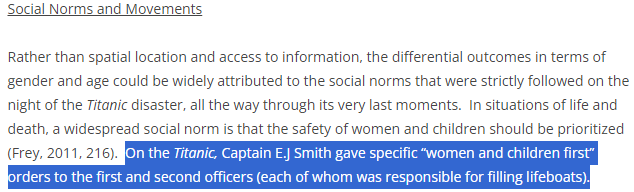

https://namu.wiki/w/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8%20%EC%B9%A8%EB%AA%B0%20%EC%82%AC%EA%B3%A0  
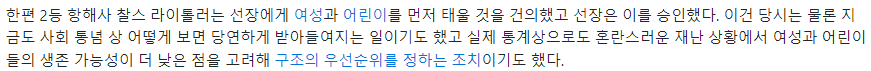

> 실제로 항해사가 선장에게 여성과 어린이를 먼저 태울 것을 건의한 사실을 확인할 수 있다.

### (4) 객실 등급(class)에 따른 생존률 확인

class(수치형 객실 등급) : First = 1등석, Second = 2등석, Third = 3등석

In [36]:
# class에 따른 alive 도수 확인
survive_ca = titanic.loc[:, ['class', 'alive']].value_counts()
survive_ca

class   alive
Third   no       270
First   yes      134
Third   yes       96
Second  yes       81
First   no        78
Second  no        72
Name: count, dtype: int64

In [37]:
# 1등급 객실 생존률
survive_class1_rate = survive_ca.loc['First', 'yes'] / survive_ca.loc['First'].sum()
# 2등급 객실 생존률
survive_class2_rate = survive_ca.loc['Second', 'yes'] / survive_ca.loc['Second'].sum()
# 3등급 객실 생존률
survive_class3_rate = survive_ca.loc['Third', 'yes'] / survive_ca.loc['Third'].sum()

print(f'1등급 객실 생존률: {np.round(survive_class1_rate*100, 2)}%')
print(f'2등급 객실 생존률: {np.round(survive_class2_rate*100, 2)}%')
print(f'3등급 객실 생존률: {np.round(survive_class3_rate*100, 2)}%')

1등급 객실 생존률: 63.21%
2등급 객실 생존률: 52.94%
3등급 객실 생존률: 26.23%


> 객실 등급이 낮아질 수록 생존률이 낮아지는 것을 확인할 수 있다.  
이를 통해 객실 등급이 낮을 수록 대피 시설이 취약했거나 구조 순위가 낮았을 가능성이 있다.

https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/  
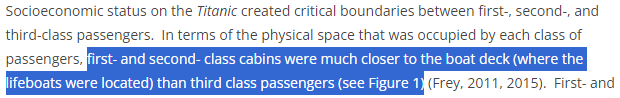

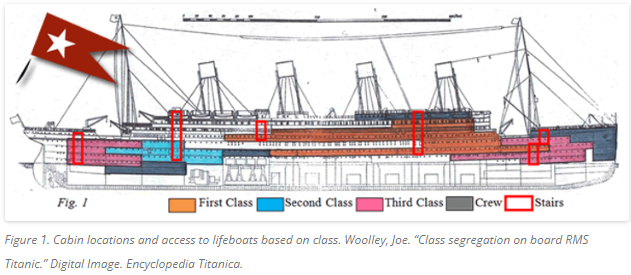

> 실제로 3등급 객실이 선박의 데크와 거리가 제일 먼 것을 확인할 수 있다.

### (5) 나이(new_age)에 따른 생존률 확인

In [38]:
# new_age에 따른 alive 도수 확인
survive_na = titanic.loc[:, ['age_group', 'alive']].value_counts()
survive_na

age_group  alive
30대        no       128
20대        no       115
30대        yes      104
20대        yes       71
10대        no        53
40대        no        53
10대        yes       41
1~9세       yes       36
40대        yes       34
50대        no        28
1~9세       no        24
60대 이상     no        19
50대        yes       18
60대 이상     yes        7
Name: count, dtype: int64

In [39]:
# 1~9세 생존률
survive_0_rate = survive_na.loc['1~9세', 'yes'] / survive_na.loc['1~9세'].sum()
# 10대 생존률
survive_10_rate = survive_na.loc['10대', 'yes'] / survive_na.loc['10대'].sum()
# 20대 생존률
survive_20_rate = survive_na.loc['20대', 'yes'] / survive_na.loc['20대'].sum()
# 30대 생존률
survive_30_rate = survive_na.loc['30대', 'yes'] / survive_na.loc['30대'].sum()
# 40대 생존률
survive_40_rate = survive_na.loc['40대', 'yes'] / survive_na.loc['40대'].sum()
# 50대 생존률
survive_50_rate = survive_na.loc['50대', 'yes'] / survive_na.loc['50대'].sum()
# 60세 이상 생존률
survive_60_rate = survive_na.loc['60대 이상', 'yes'] / survive_na.loc['60대 이상'].sum()

print(f'1~9세 생존률: {np.round(survive_0_rate*100, 2)}%')
print(f'10대 생존률: {np.round(survive_10_rate*100, 2)}%')
print(f'20대 생존률: {np.round(survive_20_rate*100, 2)}%')
print(f'30대 생존률: {np.round(survive_30_rate*100, 2)}%')
print(f'40대 생존률: {np.round(survive_40_rate*100, 2)}%')
print(f'50대 생존률: {np.round(survive_50_rate*100, 2)}%')
print(f'60세 이상 생존률: {np.round(survive_60_rate*100, 2)}%')

1~9세 생존률: 60.0%
10대 생존률: 43.62%
20대 생존률: 38.17%
30대 생존률: 44.83%
40대 생존률: 39.08%
50대 생존률: 39.13%
60세 이상 생존률: 26.92%


> 1~9세의 생존률이 약 61% 가장 높긴 하지만 다른 연령대의 차이가 크지 않아 통계적 가설검정이 필요해 보인다.  
연령대별 생존률이 통계적으로 유의한지 확인하기 위해서는 교차분석(카이제곱검정)을 진행하면 확인 가능하다.

카이제곱 검정 통계량: 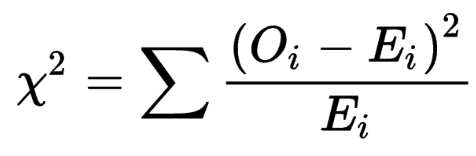

귀무가설(H0): 연령대별 승객의 생존률에는 차이가 없다.  
대립가설(H1): 연령대별 승객의 생존률에는 차이가 있다.  
(유의수준 0.05라고 가정)

In [40]:
# 교차표 생성
contingency_table1 = pd.crosstab(titanic['age_group'], titanic['alive'])
contingency_table1

alive,no,yes
age_group,,
1~9세,24,36
10대,53,41
20대,115,71
30대,128,104
40대,53,34
50대,28,18
60대 이상,19,7


In [41]:
# 카이제곱 검정 수행 (chi2: 검정 통계량, p: 유의확률, dof: 자유도, expected: 기대 도수)
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f'카이제곱 통계량: {chi2}')
print(f'유의확률: {p}')
print(f'자유도: {dof}')
print(f'기대 도수:\n{expected}')

카이제곱 통계량: 12.71469653862122
유의확률: 0.04779706640616486
자유도: 6
기대 도수:
[[ 34.47332421  25.52667579]
 [ 54.00820793  39.99179207]
 [106.86730506  79.13269494]
 [133.29685363  98.70314637]
 [ 49.98632011  37.01367989]
 [ 26.42954856  19.57045144]
 [ 14.93844049  11.06155951]]


> 유의확률이 0.047로 유의수준 0.05보다 작으므로 귀무가설 기각  
즉, 연령대별 승객의 생존률에는 차이가 있다고 볼 수 있다.

https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/  
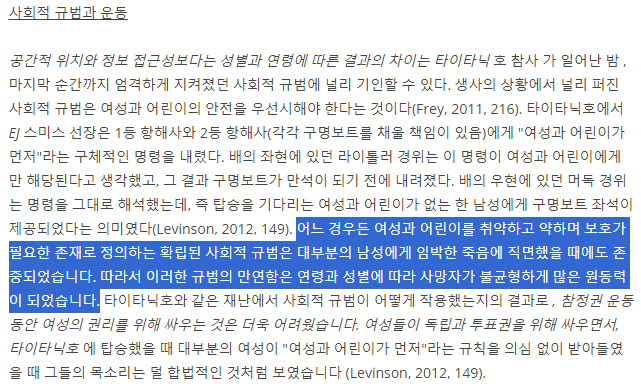

> 따라서 신체능력이 떨어지고 나이가 많은 노인들은 생존률이 낮았으며 더욱이 여성과 어린아이를 우선적으로 구조했기 때문에 1~9세의 생존률이 가장 높게 나온 것으로 추측할 수 있다.

### (6) 혼자 탑승 여부(alone)에 따른 생존률 확인

alone(혼자 탑승 여부) : True(혼자 탑승), False(동승 탑승)

In [42]:
# alone에 따른 alive 도수 확인
survive_aa = titanic.loc[:, ['alone', 'alive']].value_counts()
survive_aa

alone  alive
True   no       261
False  yes      168
       no       159
True   yes      143
Name: count, dtype: int64

In [43]:
# 혼자 탑승한 승객의 생존률
survive_alone_rate = survive_aa.loc[True, 'yes'] / survive_aa.loc[True].sum()
# 동승한 승객의 생존률
survive_with_rate = survive_aa.loc[False, 'yes'] / survive_aa.loc[False].sum()

print(f'혼자 탑승한 승객의 생존률: {np.round(survive_alone_rate*100, 2)}%')
print(f'동승한 승객의 생존률: {np.round(survive_with_rate*100, 2)}%')

혼자 탑승한 승객의 생존률: 35.4%
동승한 승객의 생존률: 51.38%


> 동승한 승객의 생존률이 약 51%로 더 높긴 하지만 큰 차이가 아니므로 통계적 가설검정이 필요해 보인다.  
동승한 승객의 생존률이 통계적으로 유의한지 확인하기 위해서는 교차분석(카이제곱검정)을 진행하면 확인 가능하다.

귀무가설(H0): 혼자 탑승한 승객과 동승한 승객의 생존률에는 차이가 없다.  
대립가설(H1): 혼자 탑승한 승객과 동승한 승객의 생존률에는 차이가 있다.  
(유의수준 0.05라고 가정)

In [44]:
# 교차표 생성
contingency_table2 = pd.crosstab(titanic['alone'], titanic['alive'])
contingency_table2

alive,no,yes
alone,,
False,159,168
True,261,143


In [45]:
# 카이제곱 검정 수행 (chi2: 검정 통계량, p: 유의확률, dof: 자유도, expected: 기대 도수)
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f'카이제곱 통계량: {chi2}')
print(f'유의확률: {p}')
print(f'자유도: {dof}')
print(f'기대 도수:\n{expected}')

카이제곱 통계량: 18.231667539429566
유의확률: 1.9559949132472893e-05
자유도: 1
기대 도수:
[[187.87961696 139.12038304]
 [232.12038304 171.87961696]]


> 유의확률이 1.955994913247289e-05로 유의수준 0.05보다 작으므로 귀무가설 기각  
즉, 혼자 탑승한 승객과 동승한 승객의 생존률에는 차이가 있다고 볼 수 있다.

### (7) 탑승지(embark_town)에 따른 생존률 확인

embark_town(탑승지) : Cherbourg = 셰르부르, Queenstown = 퀸즈타운, Southampton = 사우샘프턴

In [46]:
# embark_town에 따른 alive 도수 확인
survive_ea = titanic.loc[:, ['embark_town', 'alive']].value_counts()
survive_ea

embark_town  alive
Southampton  no       322
             yes      207
Cherbourg    yes       87
             no        61
Queenstown   no        37
             yes       17
Name: count, dtype: int64

In [47]:
# 사우샘프턴에서 탑승한 승객의 생존률
survive_S_rate = survive_ea.loc['Southampton', 'yes'] / survive_ea.loc['Southampton'].sum()
# 셰르부르에서 탑승한 승객의 생존률
survive_C_rate = survive_ea.loc['Cherbourg', 'yes'] / survive_ea.loc['Cherbourg'].sum()
# 퀸즈타운에서 탑승한 승객의 생존률
survive_Q_rate = survive_ea.loc['Queenstown', 'yes'] / survive_ea.loc['Queenstown'].sum()

print(f'사우샘프턴에서 탑승한 승객의 생존률: {np.round(survive_S_rate*100, 2)}%')
print(f'셰르부르에서 탑승한 승객의 생존률: {np.round(survive_C_rate*100, 2)}%')
print(f'퀸즈타운에서 탑승한 승객의 생존률: {np.round(survive_Q_rate*100, 2)}%')

사우샘프턴에서 탑승한 승객의 생존률: 39.13%
셰르부르에서 탑승한 승객의 생존률: 58.78%
퀸즈타운에서 탑승한 승객의 생존률: 31.48%


> 셰르부르에서 탑승한 승객의 생존률이 약 58%로 가장 높긴 하지만 큰 차이가 아니므로 통계적 가설검정이 필요해 보인다.  
각 탑승객들의 생존률이 통계적으로 유의한지 확인하기 위해서는 교차분석(카이제곱검정)을 진행하면 확인 가능하다.

귀무가설(H0): 사우샘프턴, 셰르부르, 퀸즈타운에서 탑승한 승객들 간의 생존률에는 차이가 없다.  
대립가설(H1): 사우샘프턴, 셰르부르, 퀸즈타운에서 탑승한 승객들 간의 생존률에는 차이가 있다.  
(유의수준 0.05라고 가정)  

In [48]:
# 교차표 생성
contingency_table3 = pd.crosstab(titanic['embark_town'], titanic['alive'])
contingency_table3

alive,no,yes
embark_town,,
Cherbourg,61,87
Queenstown,37,17
Southampton,322,207


In [49]:
# 카이제곱 검정 수행 (chi2: 검정 통계량, p: 유의확률, dof: 자유도, expected: 기대 도수)
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f'카이제곱 통계량: {chi2}')
print(f'유의확률: {p}')
print(f'자유도: {dof}')
print(f'기대 도수:\n{expected}')

카이제곱 통계량: 21.193105195610553
유의확률: 2.5002053466599816e-05
자유도: 2
기대 도수:
[[ 85.03419973  62.96580027]
 [ 31.02599179  22.97400821]
 [303.93980848 225.06019152]]


> 유의확률이 2.500205346659981e-05로 유의수준 0.05보다 작으므로 귀무가설 기각  
즉, 사우샘프턴, 셰르부르, 퀸즈타운에서 탑승한 승객들 간의 생존률에는 차이가 있다고 볼 수 있다.

##### 비록 모든 컬럼에서의 생존률의 차이에 대한 근거와 해석을 파악하지는 못했지만 여러 집단 간 생존률의 차이가 존재함을 확인하였으며 특히 성인 남성의 경우에는 구조 우선순위에서 밀려나 생존률이 낮은 것을 확인하였다.